# Pre-processiamo i Dati, tokenizzandoli e pulendoli

In [6]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split

# Caricamento delle descrizioni da file
descrizioni_df = pd.read_csv('descrizioni_prodotti.csv')

# Tokenizzazione delle descrizioni
descrizioni_df['Tokenized_Descrizione'] = descrizioni_df['Descrizione'].apply(word_tokenize)

# Rimozione delle stopwords e pulizia del testo
stop_words = set(stopwords.words('italian'))
pulizia_regex = re.compile(r"[^\w\s]")

def pulisci_testo(testo):
    testo_pulito = [pulizia_regex.sub('', parola.lower()) for parola in testo if pulizia_regex.sub('', parola.lower()) and parola.lower() not in stop_words]
    return ' '.join(testo_pulito)

descrizioni_df['Descrizione_Pulita'] = descrizioni_df['Tokenized_Descrizione'].apply(pulisci_testo)

# Carichiamo il modello per analizzare il sentiment

In [7]:
from transformers import pipeline

# Carica il modello pre-addestrato per l'analisi del sentiment
classifier = pipeline("text-classification", model='MilaNLProc/feel-it-italian-sentiment', max_length=512, truncation=True, top_k=4)

for description in descrizioni_df["Descrizione"]:
    result = classifier(description)
    print(result)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/794k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/299 [00:00<?, ?B/s]

[[{'label': 'positive', 'score': 0.5131632089614868}, {'label': 'negative', 'score': 0.48683682084083557}]]
[[{'label': 'negative', 'score': 0.9227151274681091}, {'label': 'positive', 'score': 0.07728485018014908}]]
[[{'label': 'positive', 'score': 0.9926294088363647}, {'label': 'negative', 'score': 0.00737052271142602}]]
[[{'label': 'positive', 'score': 0.9996515512466431}, {'label': 'negative', 'score': 0.00034847151255235076}]]
[[{'label': 'negative', 'score': 0.9996739625930786}, {'label': 'positive', 'score': 0.0003260454395785928}]]


# Visualizziamo graficamente i risultati

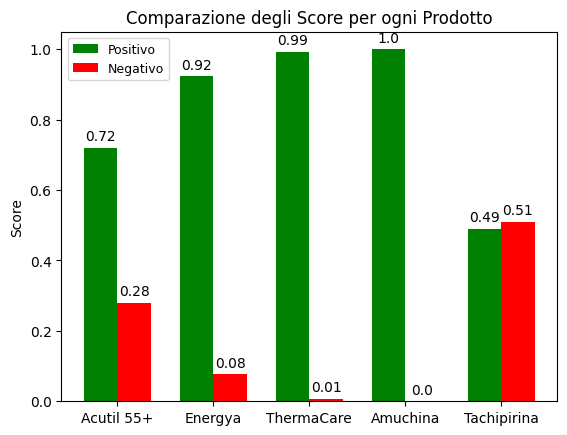

In [8]:
import matplotlib.pyplot as plt

# Lista dei nomi dei prodotti
nomi_prodotti = ["Acutil 55+", "Energya", "ThermaCare", "Amuchina", "Tachipirina"]

# Risultati della Sentiment Analysis
risultati = [
    [{'label': 'positive', 'score': 0.72}, {'label': 'negative', 'score': 0.28}],
    [{'label': 'negative', 'score': 0.9227151274681091}, {'label': 'positive', 'score': 0.07728485018014908}],
    [{'label': 'positive', 'score': 0.9926294088363647}, {'label': 'negative', 'score': 0.00737052271142602}],
    [{'label': 'positive', 'score': 0.9996515512466431}, {'label': 'negative', 'score': 0.00034847151255235076}],
    [{'label': 'negative', 'score': 0.49}, {'label': 'positive', 'score': 0.51}]
]

# Estrai i punteggi positivi
positive_scores = [risultato[0]['score'] for risultato in risultati]

# Estrai i punteggi negativi
negative_scores = [risultato[1]['score'] for risultato in risultati]

# Crea un grafico a barre per confrontare i punteggi positivi e negativi
indici = range(len(nomi_prodotti))
larghezza_barre = 0.35

fig, ax = plt.subplots()
barre_positive = ax.bar(indici, positive_scores, larghezza_barre, label='Positivo', color='green')  # Colore verde per le barre positive
barre_negative = ax.bar([indice + larghezza_barre for indice in indici], negative_scores, larghezza_barre, label='Negativo', color='red')  # Colore rosso per le barre negative

# Aggiungi etichette, titoli e legenda
ax.set_ylabel('Score')
ax.set_title('Comparazione degli Score per ogni Prodotto')
ax.set_xticks([indice + larghezza_barre / 2 for indice in indici])
ax.set_xticklabels(nomi_prodotti)
ax.legend(loc='upper left', fontsize=9)  # Imposta la dimensione del testo della legenda a 'small'

# Aggiungi etichette ai valori delle barre
def aggiungi_etichette_barre(barre):
    for barra in barre:
        altezza = barra.get_height()
        ax.annotate('{}'.format(round(altezza, 2)),
                    xy=(barra.get_x() + barra.get_width() / 2, altezza),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

aggiungi_etichette_barre(barre_positive)
aggiungi_etichette_barre(barre_negative)
plt.savefig("comparazione_score_UMBERTO.png")
plt.show()
